<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv")

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=180, step=1)

In [7]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
data.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


<Axes: xlabel='count', ylabel='Product'>

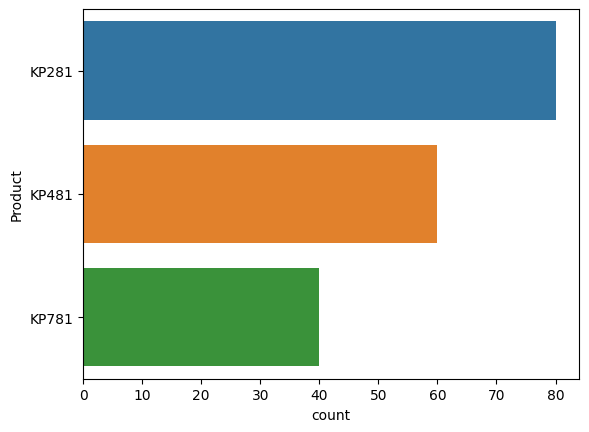

In [10]:
sns.countplot(data=data, y = "Product")

<Axes: xlabel='count', ylabel='Gender'>

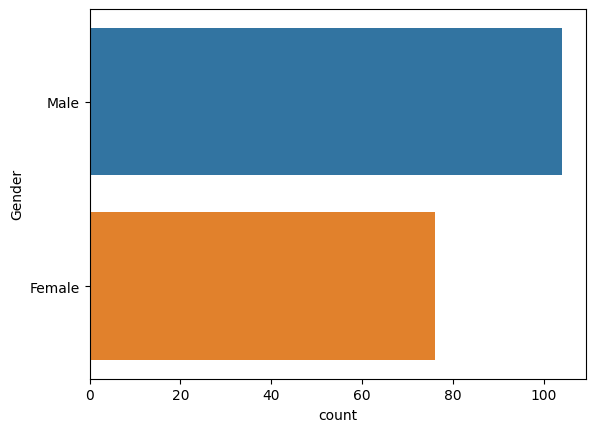

In [11]:
sns.countplot(data=data,y="Gender")

<Axes: xlabel='count', ylabel='Gender'>

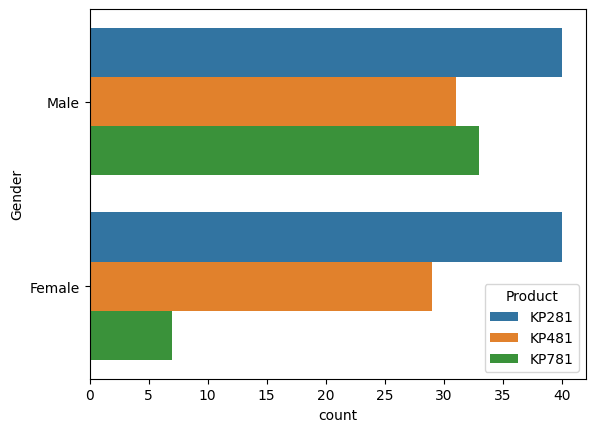

In [12]:
sns.countplot(data=data,y="Gender",hue= "Product")

<Axes: xlabel='count', ylabel='Education'>

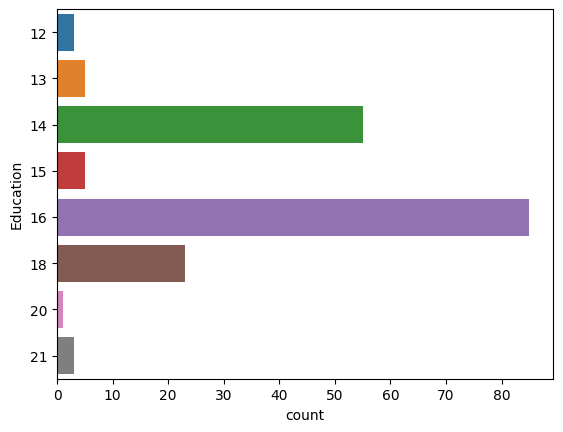

In [13]:
sns.countplot(data=data, y="Education")

<Axes: xlabel='count', ylabel='Education'>

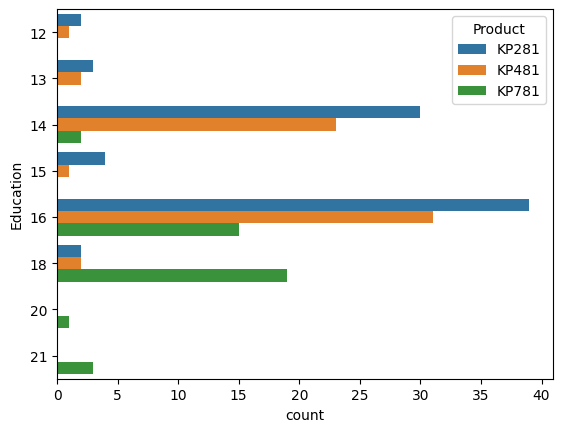

In [14]:
sns.countplot(data=data, y="Education", hue = "Product")

<Axes: xlabel='Age', ylabel='Count'>

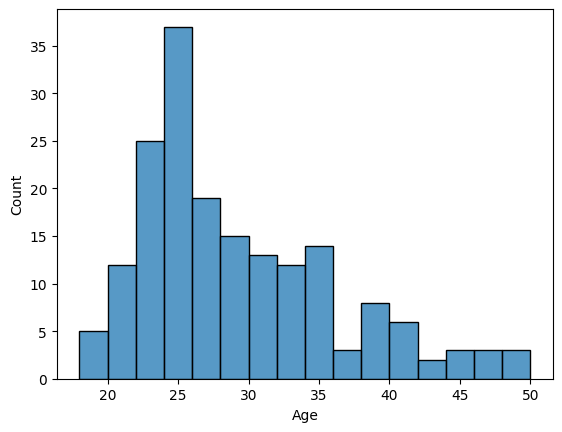

In [15]:
sns.histplot(data["Age"], bins = 16)

<Axes: xlabel='Age', ylabel='Count'>

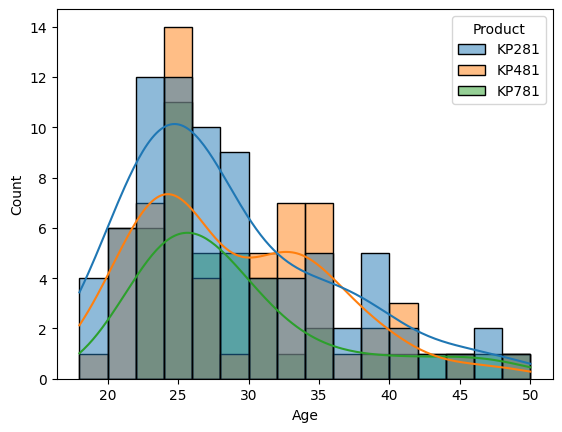

In [16]:
sns.histplot(data= data, x=data["Age"], bins = 16,hue="Product",kde = True)

<Axes: xlabel='Age', ylabel='Density'>

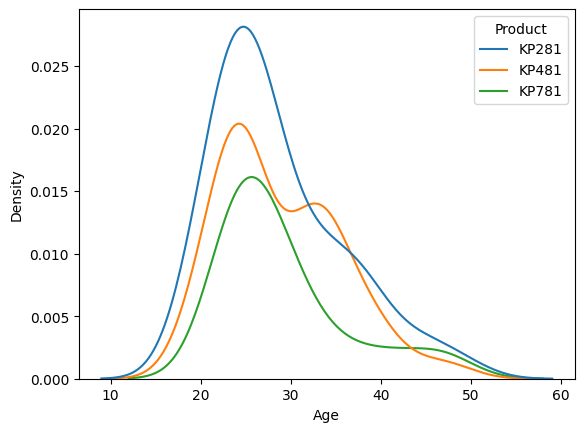

In [17]:
sns.kdeplot(data= data, x=data["Age"],hue="Product")

<Axes: xlabel='MaritalStatus', ylabel='count'>

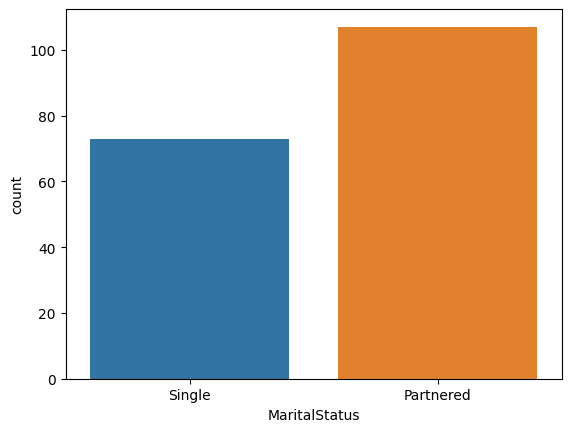

In [18]:
sns.countplot(data=data, x="MaritalStatus")

<Axes: xlabel='MaritalStatus', ylabel='count'>

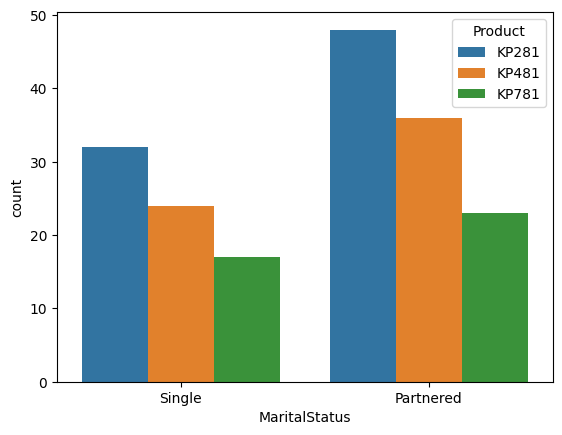

In [19]:
sns.countplot(data=data, x="MaritalStatus", hue= "Product")

<Axes: xlabel='Usage', ylabel='count'>

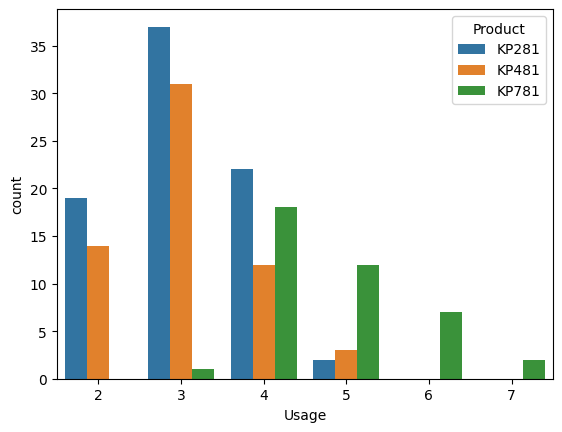

In [20]:
sns.countplot(data=data,x="Usage",hue="Product")

<Axes: xlabel='Fitness', ylabel='count'>

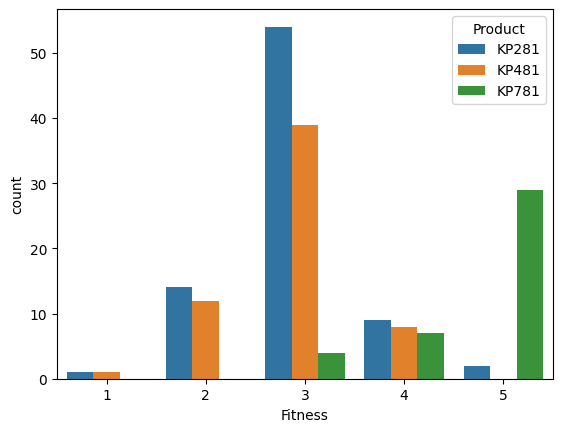

In [21]:
sns.countplot(data=data,x="Fitness",hue="Product")

In [22]:
for i in data.columns:
  print(i, ":", data[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


<Axes: xlabel='Income', ylabel='Count'>

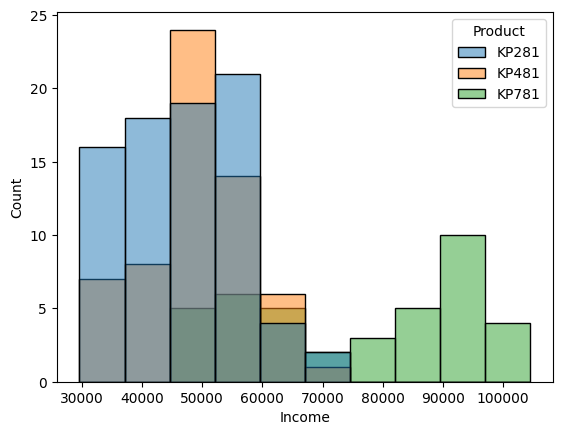

In [23]:
sns.histplot(data= data ,x = data["Income"], bins = 10, hue="Product")

<Axes: xlabel='Income', ylabel='Density'>

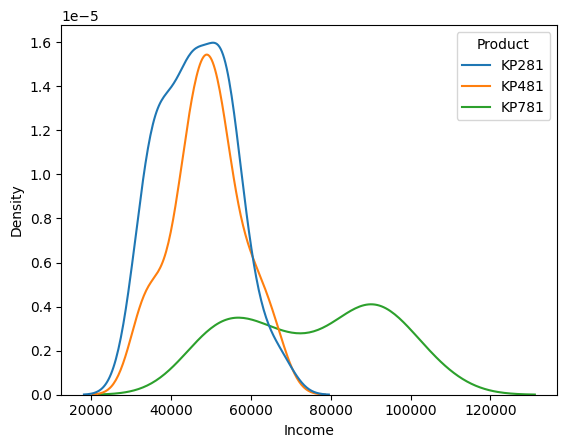

In [24]:
sns.kdeplot(data=data,x="Income",hue="Product")

In [25]:
datakp781=data[data["Product"] == "KP781"]
datakp481=data[data["Product"] == "KP481"]
datakp281=data[data["Product"] == "KP281"]

In [26]:
for i in data.columns:
  print(i , data[i].min(), data[i].max())

Product KP281 KP781
Age 18 50
Gender Female Male
Education 12 21
MaritalStatus Partnered Single
Usage 2 7
Fitness 1 5
Income 29562 104581
Miles 21 360


<Axes: xlabel='Miles', ylabel='Education'>

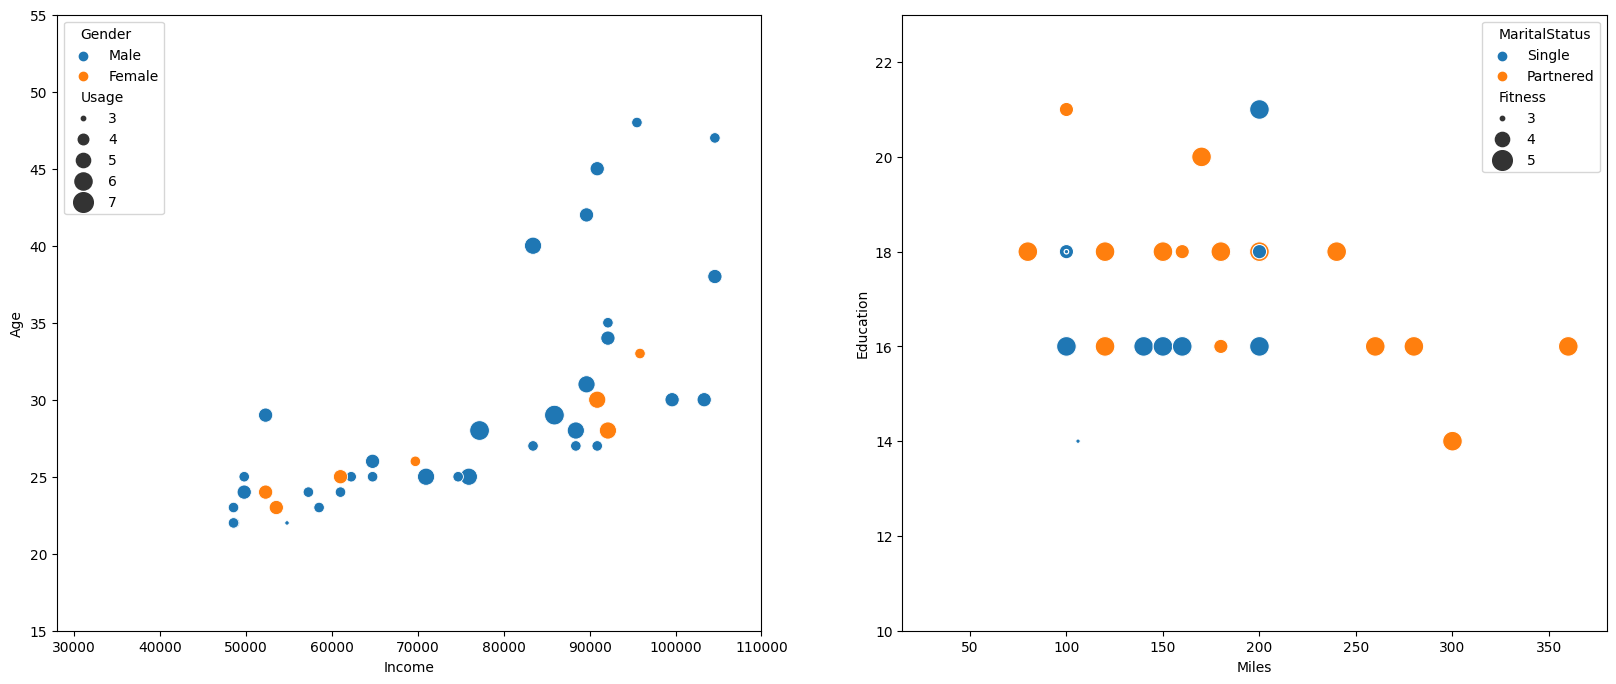

In [27]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp781,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp781,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

<Axes: xlabel='Miles', ylabel='Education'>

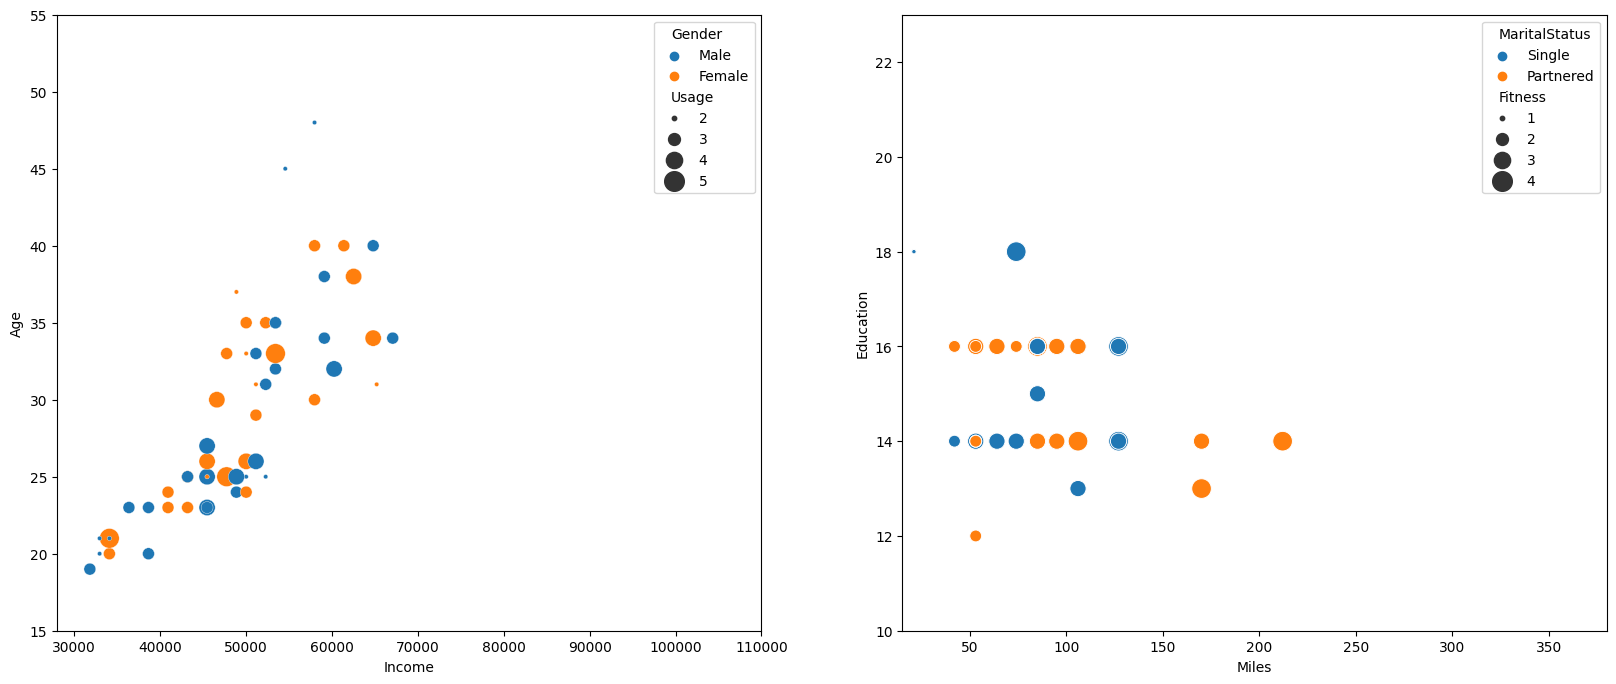

In [28]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp481,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp481,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

<Axes: xlabel='Miles', ylabel='Education'>

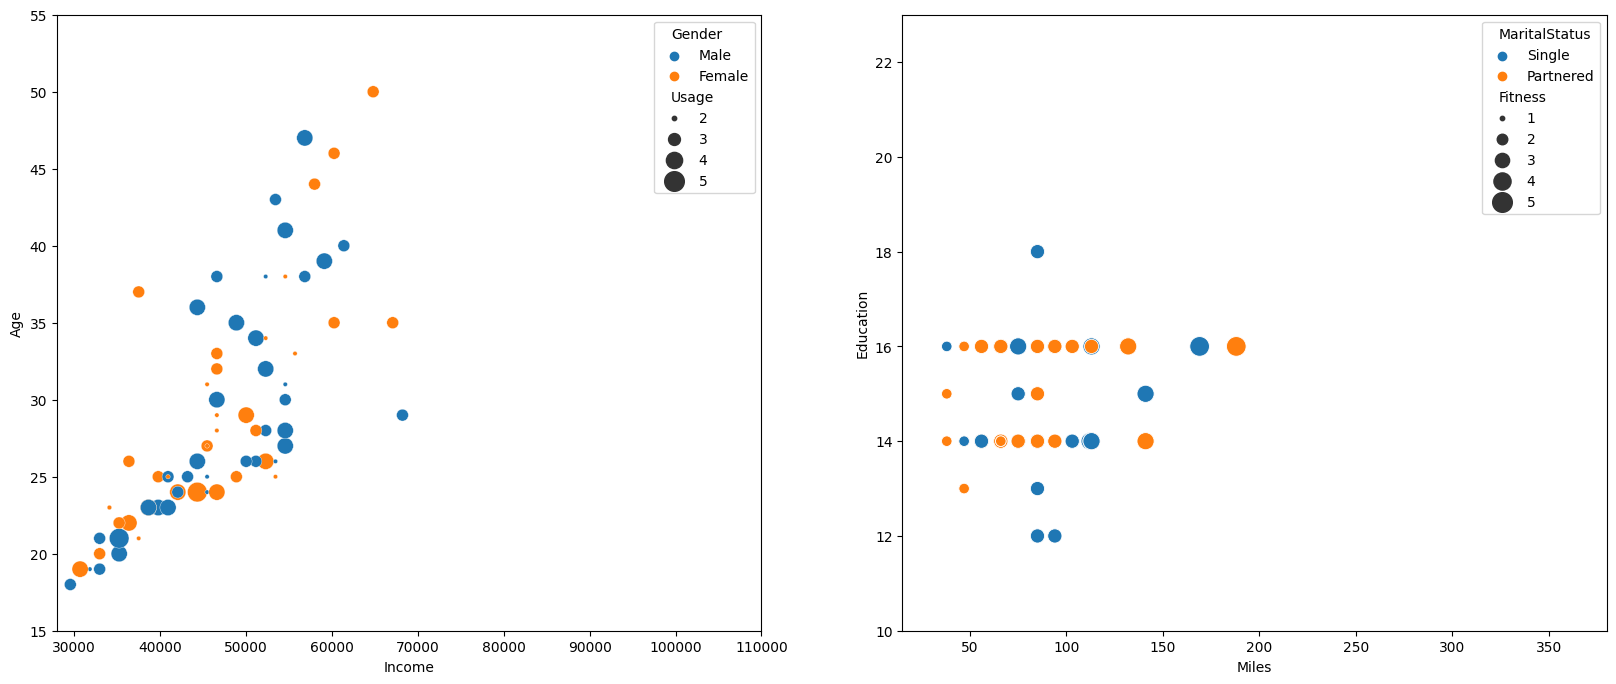

In [29]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp281,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp281,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

In [30]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [47]:
pd.pivot_table(data=data, columns = "Product",index = ["Gender","MaritalStatus"],aggfunc="mean",margins = True)

Age                                   Education  \
Product                   KP281      KP481      KP781        All      KP281   
Gender MaritalStatus                                                          
Female Partnered      28.333333  30.000000  29.000000  28.934783  14.888889   
       Single         28.692308  28.142857  24.333333  28.000000  15.538462   
Male   Partnered      31.380952  30.380952  30.000000  30.606557  15.428571   
       Single         25.631579  25.200000  28.928571  26.604651  14.473684   
All                   28.550000  28.900000  29.100000  28.788889  15.037500   

                                                        Fitness            \
Product                   KP481      KP781        All     KP281     KP481   
Gender MaritalStatus                                                        
Female Partnered      15.200000  17.500000  15.217391  2.851852  2.933333   
       Single         15.214286  18.333333  15.666667  2.923077  2.785714   
Male   Partnered      15.285714  17.421053  16.000000  2.857143  2.904762   
       Single         14.500000  16.928571  15.279070  3.263158  3.000000   
All                   15.116667  17.325000  15.572222  2.962500  2.900000   

                      ...        Income                    Miles             \
Product               ...         KP781           All      KP281      KP481   
Gender MaritalStatus  ...                                                     
Female Partnered      ...  84972.250000  50693.760870  74.925926  94.000000   
       Single         ...  58516.000000  48502.800000  78.846154  80.214286   
Male   Partnered      ...  81431.368421  59585.704918  80.190476  87.238095   
       Single         ...  68216.428571  52274.395349  99.526316  91.100000   
All                   ...  75441.575000  53719.577778  82.787500  87.933333   

                                                 Usage                      \
Product                    KP781         All     KP281     KP481     KP781   
Gender MaritalStatus                                                         
Female Partnered      215.000000   93.326087  2.851852  3.333333  5.250000   
       Single         133.333333   84.933333  3.000000  2.928571  4.666667   
Male   Partnered      176.315789  112.557377  3.285714  2.857143  4.842105   
       Single         147.571429  113.209302  3.263158  3.300000  4.571429   
All                   166.900000  103.194444  3.087500  3.066667  4.775000   

                                
Product                    All  
Gender MaritalStatus            
Female Partnered      3.217391  
       Single         3.133333  
Male   Partnered      3.622951  
       Single         3.697674  
All                   3.455556  

[5 rows x 24 columns]

In [40]:
pd.crosstab([data["Gender"],data["MaritalStatus"]],data["Product"],margins = True)

Product               KP281  KP481  KP781  All
Gender MaritalStatus                          
Female Partnered         27     15      4   46
       Single            13     14      3   30
Male   Partnered         21     21     19   61
       Single            19     10     14   43
All                      80     60     40  180

In [50]:
data.columns
print("Enter propoability Column then Conditional column with space")
A = input()
B = A.split(" ")
C = pd.crosstab(data[B[0]],data[B[1]])
for i in C.columns

Enter propoability Column then Conditional column with space
Product Gender


Gender,Product,Female,Male
0,KP281,40,40
1,KP481,29,31
2,KP781,7,33


In [52]:
D = pd.crosstab(data["Product"],data["Gender"],margins = True)

In [58]:
D

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [61]:
D.index

Index(['KP281', 'KP481', 'KP781', 'All'], dtype='object', name='Product')

In [63]:
D.columns

Index(['Female', 'Male', 'All'], dtype='object', name='Gender')

In [80]:
# Need to Change Columns age,miles,income into some buckets
for k in data.columns:
  print("propabilities of Products given",k)
  D = pd.crosstab(data["Product"],data[k],margins = True)
  for i in D.index:
    for j in D.columns[-2::-1][::-1]:
      #print(i,j,":", round(D.loc[i][j]/D.loc[i]["All"],2))
      print("P(",i,"|",j,") =",round(D.loc[i][j]/D.loc[i]["All"],2))
  print("----------------------------------------------------------")
  print("----------------------------------------------------------")

propabilities of Products given Product
P( KP281 | KP281 ) = 1.0
P( KP281 | KP481 ) = 0.0
P( KP281 | KP781 ) = 0.0
P( KP481 | KP281 ) = 0.0
P( KP481 | KP481 ) = 1.0
P( KP481 | KP781 ) = 0.0
P( KP781 | KP281 ) = 0.0
P( KP781 | KP481 ) = 0.0
P( KP781 | KP781 ) = 1.0
P( All | KP281 ) = 0.44
P( All | KP481 ) = 0.33
P( All | KP781 ) = 0.22
----------------------------------------------------------
----------------------------------------------------------
propabilities of Products given Age
P( KP281 | 18 ) = 0.01
P( KP281 | 19 ) = 0.04
P( KP281 | 20 ) = 0.02
P( KP281 | 21 ) = 0.05
P( KP281 | 22 ) = 0.05
P( KP281 | 23 ) = 0.1
P( KP281 | 24 ) = 0.06
P( KP281 | 25 ) = 0.09
P( KP281 | 26 ) = 0.09
P( KP281 | 27 ) = 0.04
P( KP281 | 28 ) = 0.08
P( KP281 | 29 ) = 0.04
P( KP281 | 30 ) = 0.02
P( KP281 | 31 ) = 0.02
P( KP281 | 32 ) = 0.02
P( KP281 | 33 ) = 0.02
P( KP281 | 34 ) = 0.02
P( KP281 | 35 ) = 0.04
P( KP281 | 36 ) = 0.01
P( KP281 | 37 ) = 0.01
P( KP281 | 38 ) = 0.05
P( KP281 | 39 ) = 0.01
P( K